In [1]:
import numpy as np
from matplotlib import pyplot as plt
from ad_afqmc.lno_ccsd import lno_ccsd
lno_data = lno_ccsd.lno_data


In [2]:
# H30 a=d=1.831
# converged SCF energy = -15.7565823173806
# E(RCCSD) = -16.22295654569875  E_corr = -0.4663742283181489
# RCCSD(T) correction = -0.0121409773978195
# ccsd(t) energy: -16.235097523096567
# AFQMC energy: -16.2346 +/- 0.0004
# DMRG energy E = -16.2393926601
ccsd_corr = -0.4663742283181489
ccsd_t_corr = -16.235097523096567 - -15.7565823173806
dmrg_corr = -16.2393926601 - -15.7565823173806
dmrg_err = 0.0024828587
afqmc_corr = -16.2346 - -15.7565823173806
afqmc_err = 0.0004
data='''
# thresh(occ,vir)   afqmc_corr   err   mp2_afqmc_corr   ccsd_corr   hf_cr    err   ccsd_cr   err   ave_olp_ratio   err   ave_norb   max_norb   ave_nelec   max_nelec  run_time
 (1.00e-03,1.00e-04)     -0.419894       0.000054        -0.449926       -0.419445       -0.391397       0.000566        -0.028495       0.000546        7.07    8       4.93    6       920.84
 (3.00e-04,3.00e-05)     -0.450317       0.000058        -0.464229       -0.449508       -0.410198       0.000557        -0.040117       0.000562        8.93    10      5.73    6       994.08
 (1.00e-04,1.00e-05)     -0.464367       0.000069        -0.468504       -0.462183       -0.403669       0.000683        -0.060698       0.000618        12.00   14      8.93    10      1159.15
 (1.00e-05,1.00e-06)     -0.471842       0.000129        -0.472497       -0.466976       -0.374787       0.000583        -0.097055       0.000532        18.67   24      14.53   18      1503.28
 (1.00e-06,1.00e-07)     -0.474013       0.000207        -0.474066       -0.466843       -0.342254       0.000501        -0.131759       0.000392        24.80   28      21.73   26      2032.95
 (1.00e-07,1.00e-08)     -0.476777       0.000310        -0.476777       -0.466466       -0.321015       0.000451        -0.155761       0.000284        28.67   30      27.33   30      2514.62
'''
lno_thresh,lno_afqmc_corr,lno_afqmc_mp2_corr,lno_afqmc_err,lno_ccsd_corr,lno_ccsd_mp2_corr \
    = lno_data(data)

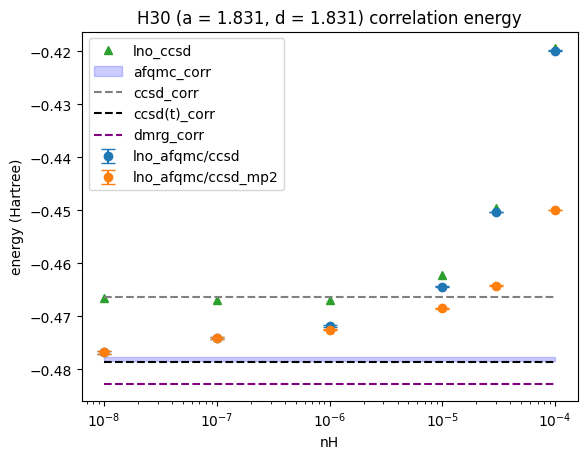

In [4]:
plt.errorbar(
    lno_thresh,lno_afqmc_corr,yerr=lno_afqmc_err,fmt='o',capsize=5,label='lno_afqmc/ccsd')
plt.errorbar(
    lno_thresh,lno_afqmc_mp2_corr,yerr=lno_afqmc_err,fmt='o',capsize=5,label='lno_afqmc/ccsd_mp2')
plt.plot(
    lno_thresh,lno_ccsd_corr,'^',label='lno_ccsd')
x = np.linspace(min(lno_thresh),max(lno_thresh),100)
plt.fill_between(
    x, afqmc_corr+afqmc_err,afqmc_corr-afqmc_err, color='blue', alpha=0.2,label='afqmc_corr')
plt.plot(x,[ccsd_corr]*100,'--',color='grey',label='ccsd_corr')
plt.plot(x,[ccsd_t_corr]*100,'--',color='black',label='ccsd(t)_corr')
plt.plot(x,[dmrg_corr]*100,'--',color='purple',label='dmrg_corr')
plt.xlabel('nH')
plt.xscale('log')
plt.ylabel('energy (Hartree)')
plt.title('H30 (a = 1.831, d = 1.831) correlation energy')
plt.legend()
plt.show()